**import needed packages**

In [ ]:
import numpy as np
import os
import pickle
import sys
from matplotlib import pyplot as plt

**ask user the scan number and save it for proper file naming**

In [ ]:
scan_num = input("insert current number of scan: ")
scan_ind = int(scan_num)

insert current number of scan: 10


**read .bit file**

In [ ]:
base_name = "lista_scansioni{}.bin"
file_name = base_name.format(scan_ind)

cards_read = [] #empty list for cards read

with open(file_name, "rb") as file_input:
  cards_read = pickle.load(file_input) #read bit file

cards_num = len(cards_read)-1 #true num of cards read(one of them is useless)

if(cards_num != 54):
  sys.exit("Condition not met. Stopping execution.")# If the condition is met stop the execution of the notebook

54


**transform bit file into np array**

In [ ]:
cards = np.zeros((cards_num,256,672)) #create empty 3d array

for i in range(cards_num):
  card_b = cards_read[i+1] #card i in bit format
  card_n = np.frombuffer(card_b, dtype='uint8')  #convert card i into np array
  card_rs = card_n.reshape((672,256)).T #reshape and traspose card i for correct visualization
  cards[i] = card_rs #add card i to the 3d array
  i=i+1


**save np array to drive and check it's present**

In [ ]:
basename = 'cards_{}.npy' #diferent name at each scan
filename = basename.format(scan_ind)

np.save(filename, cards) #save to local file

file_list = os.listdir() #retrive files of current dir

for file_name in file_list:
    print(file_name) #print file names of current dir

CVburraconew.ipynb
lista_scansioni1.bin
cards_1.npy
lista_scansioni2.bin
cards_2.npy
lista_scansioni3.bin
cards_3.npy
lista_scansioni4.bin
cards_4.npy
lista_scansioni5.bin
cards_5.npy
lista_scansioni6.bin
cards_6.npy
lista_scansioni7.bin
cards_7.npy
lista_scansioni8.bin
cards_8.npy
lista_scansioni9.bin
cards_9.npy
lista_scansioni10.bin
cards_10.npy


**display saved data to check correctness**


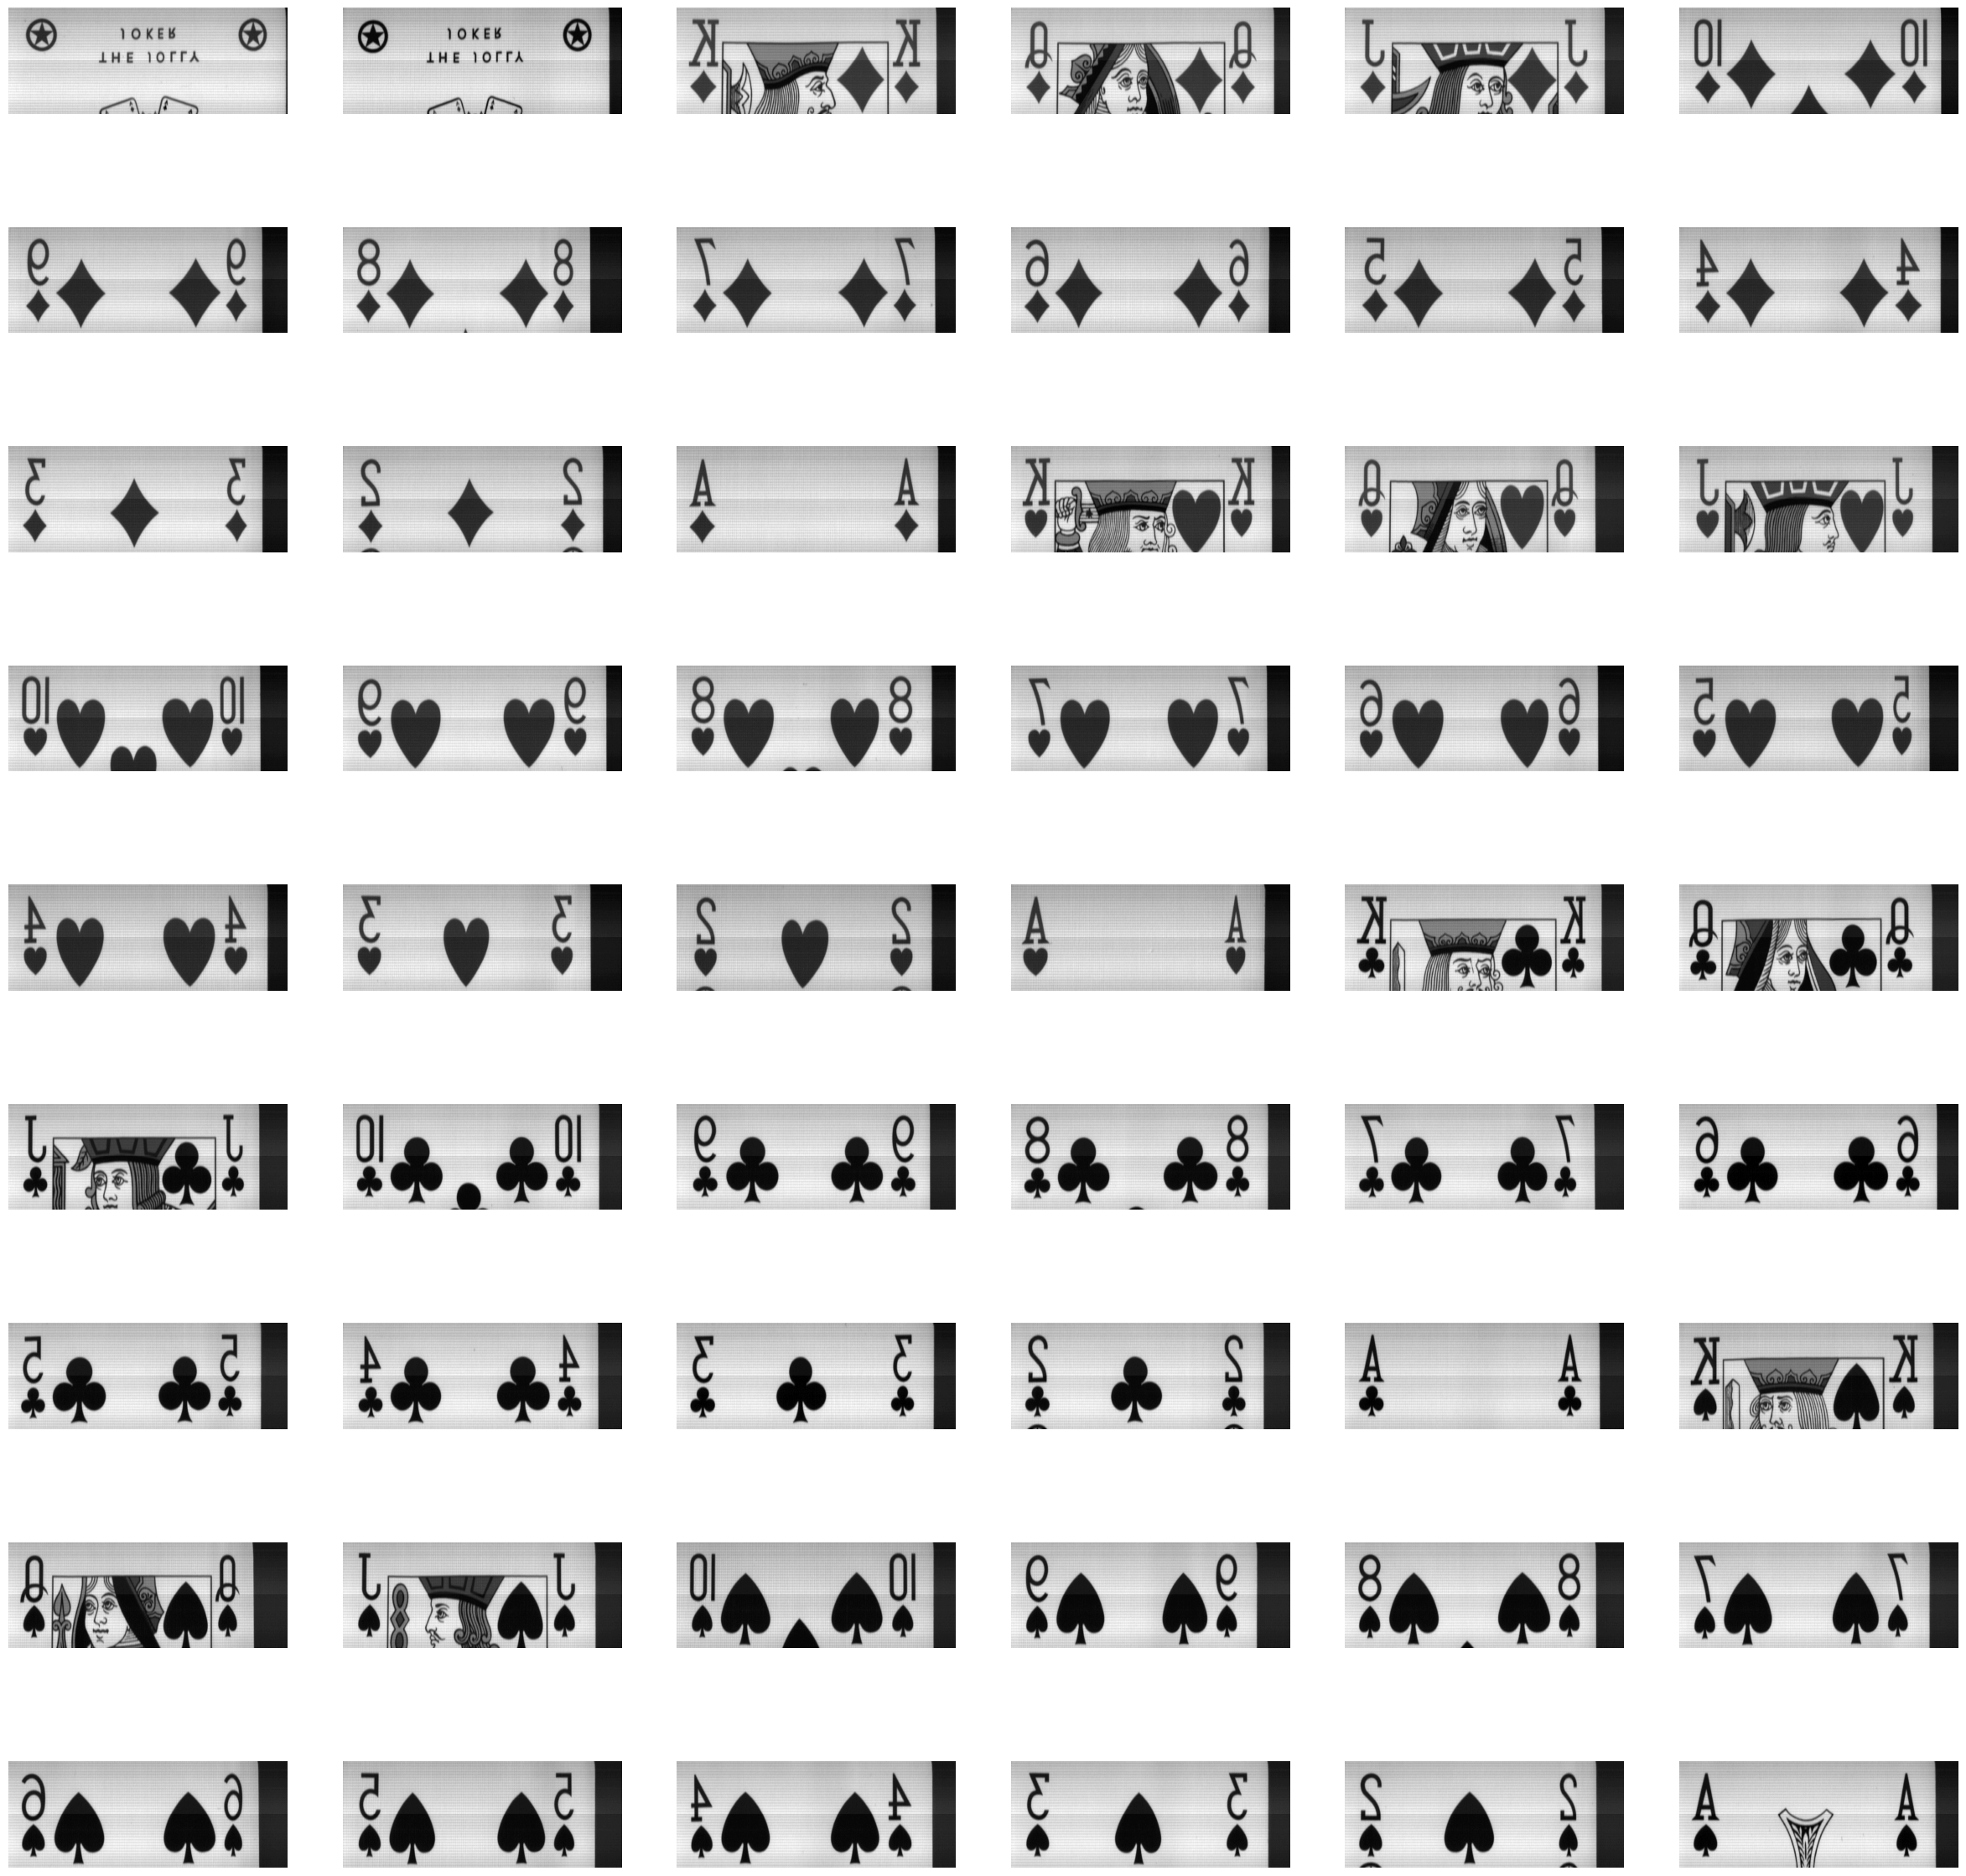

In [ ]:
cards_saved = np.load(filename)

fig, axs = plt.subplots(nrows=9, ncols=6, figsize=(30,30))

for i, ax in enumerate(axs.flat):
    ax.imshow(cards_saved[i], cmap='gray')
    ax.axis('off')

plt.show()

# dataset creation


**after reading 10 stacks of 54 cards we concate them in a (540,256,672) array**

In [ ]:
num_files = 10 #tot scans number
file_prefix = 'cards_'
file_extension = '.npy'
files = []

for i in range(1, num_files+1): #load scans
    filename = file_prefix + str(i) + file_extension
    file = np.load(filename)
    files.append(file)

raw_data = np.concatenate(files, axis=0) #concatenate scans along first dim

data_name = 'cards_tot.npy' #save cards
np.save(data_name, raw_data)



**now we label data, seeds first(spades=14,hearts=15,clubs=16,diamonds=17,jocker=18)**

In [ ]:
spades_l = np.full((13,), 14)
clubs_l = np.full((13,), 15)
hearts_l = np.full((13,), 16)
diamonds_l = np.full((13,), 17)
jokers_l = np.full((2,),18)

deck = np.concatenate((spades_l, clubs_l, hearts_l, diamonds_l, jokers_l)) #single ordered deck labels

seeds_1to5 = np.concatenate((deck, deck, deck, deck, deck)) #first 5 decks labels
seeds_5to10 = np.flip(seeds_1to5) #last 5 are flipped

seeds_labels = np.concatenate((seeds_1to5,seeds_5to10)) #total seeds labels of dim (540,)

seeds_name = 'seeds_tot.npy'
np.save(seeds_name,seeds_labels)


**numbers labels(18 for jokers)**

In [ ]:
num = np.arange(1, 14)
jok = np.full((2,), 18)
num_deck = np.concatenate((num,num,num,num,jok))

num_1to5 = np.concatenate((num_deck,num_deck,num_deck,num_deck,num_deck))
num_5to10 = np.flip(num_1to5)

num_labels = np.concatenate((num_1to5,num_5to10))

num_name = 'num_tot.npy'
np.save(num_name,num_labels)